## Finding Heavy Traffic Indicators on I-94

### About 
Analyze a dataset about westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).

### Goal
The goal of our analysis is to determine indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

### Dataset description

1. Data Set Information:
Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume.

2. Attribute Information:
- holiday Categorical US National holidays plus regional holiday, Minnesota State Fair
- `temp` Numeric Average temp in kelvin
- `rain_1h` Numeric Amount in mm of rain that occurred in the hour
- `snow_1h` Numeric Amount in mm of snow that occurred in the hour
- `clouds_all` Numeric Percentage of cloud cover
- `weather_main` Categorical Short textual description of the current weather
- `weather_description` Categorical Longer textual description of the current weather
- `date_time` DateTime Hour of the data collected in local CST time

In [2]:
import pandas as pd
data=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [13]:
# Check if any null values
data.isnull().any()

holiday                False
temp                   False
rain_1h                False
snow_1h                False
clouds_all             False
weather_main           False
weather_description    False
date_time              False
traffic_volume         False
dtype: bool

### 2. Analyzing Traffic Volume
In the next exercise, we're going to plot a histogram to visualize the distribution of the `traffic_volume` column.
1. Add the `%matplotlib inline` magic.
2. Plot a histogram to examine the distribution of the `traffic_volume` column. Use a Pandas method.
3. Use `Series.describe()` to look up a few statistics about the `traffic_volume` column.
4. Note a few observations about the distribution of `traffic_volume` based on the histogram and the result of `Series.describe()`.
5. Do you think daytime and nighttime influence the traffic volume?

Text(0.5, 0, 'Traffic volume')

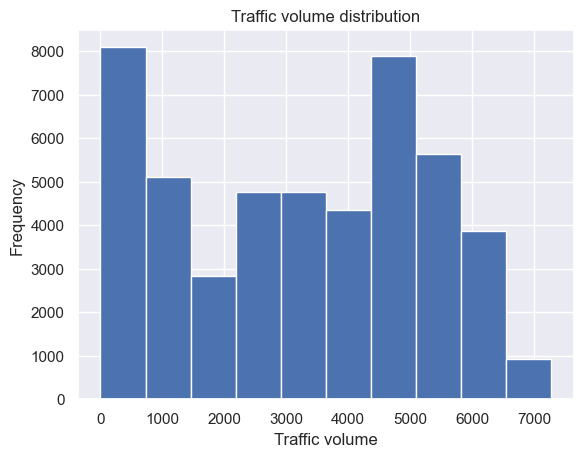

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_theme()
data['traffic_volume'].plot.hist()
plt.title('Traffic volume distribution')
plt.xlabel('Traffic volume')

- About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
- About 75% of the time, the traffic volume was four times as much (4,933 cars or more).

### 3. Traffic Volume: Day vs. Night
We'll start by dividing the dataset into two parts:
- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

1. Transform the `date_time` column to datetime by using the function `pd.to_datetime()`.
2. Use the `Series.dt.hour` property to get the hour of every instance of the `date_time` column and do the following:
   - Isolate the daytime data.
   - Isolate the nighttime data.

In [20]:
data['date_time']=pd.to_datetime(data['date_time'])
daytime=data.copy()[(data['date_time'].dt.hour>=7) & (data['date_time'].dt.hour<19)]
nighttime=data.copy()[(data['date_time'].dt.hour<7) | (data['date_time'].dt.hour>=19)]
print(nighttime.shape)
print(daytime.shape)

(24327, 9)
(23877, 9)


### 4. Traffic Volume: Day vs. Night (II)
Compare the traffic volume at night and during day.
1. Plot the histograms of `traffic_volume` for both day and night. Organize the two histograms side-by-side on a grid chart.
2. For both histograms, do the following:
   - Add a title.
   - Add x- and y-labels.
   - Bring the x- and the y-axis to the same ranges (this will help you compare the histograms correctly).
3. Use `Series.describe()` to look up a few statistics for `traffic_volume` for both day and night.
4. Analyze the results:
   - What shape do the histograms have and what does that indicate?
   - If the traffic is light at night, and our goal is to find indicators of heavy traffic, should we still be using the nighttime data?

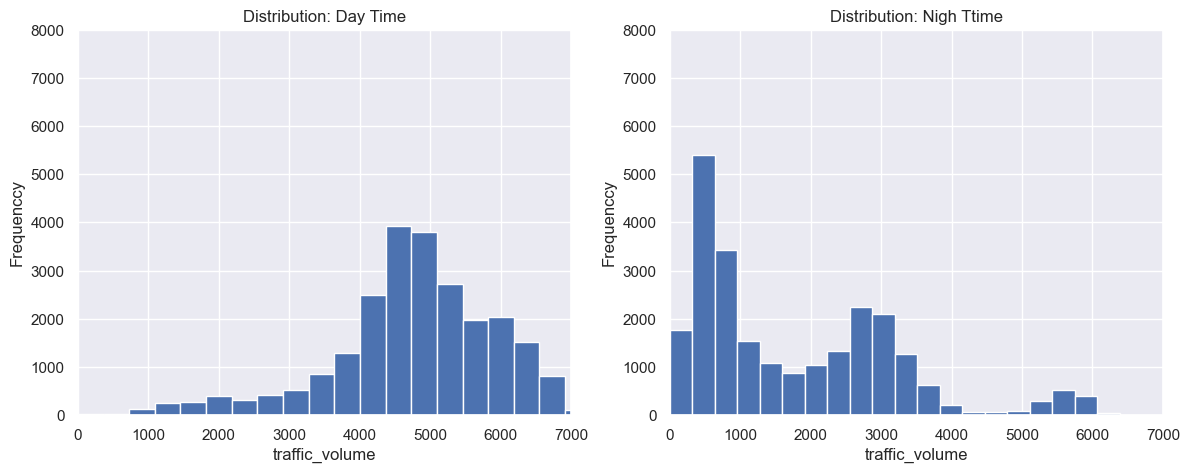

In [33]:
# Set grid figure size
plt.figure(figsize=(14,5))
sns.set_theme()

# Set daytime
plt.subplot(1,2,1)
plt.hist(daytime['traffic_volume'],bins=20)
plt.title('Distribution: Day Time')
plt.xlabel('traffic_volume')
plt.ylabel('Frequenccy')
plt.xlim([0,7000])
plt.ylim([0,8000])

# Set nighttime
plt.subplot(1,2,2)
plt.hist(nighttime['traffic_volume'],bins=20)
plt.title('Distribution: Nigh Ttime')
plt.xlabel('traffic_volume')
plt.ylabel('Frequenccy')
plt.xlim([0,7000])
plt.ylim([0,8000])

plt.show()

In [48]:
print(daytime['traffic_volume'].describe())
print('Median: ',daytime['traffic_volume'].median())
print('Mode: ',daytime['traffic_volume'].mode())

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64
Median:  4820.0
Mode:  0    5104
Name: traffic_volume, dtype: int64


In [49]:
print(nighttime['traffic_volume'].describe())
print('Median: ',nighttime['traffic_volume'].median())
print('Mode: ',nighttime['traffic_volume'].mode())

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64
Median:  1287.0
Mode:  0    353
1    356
Name: traffic_volume, dtype: int64


- Day time traffic distribution is left-skewed, refer to traffic volume in most of time is high (4000~7000). 75% time traffic volume is at least 4252. Mean is 4762 and median is 4860.  
- Night time traffic distribution is right-skew, refer to most of time traffic volume is rather lower than 1000. 75% time traffic volume is only 2819. Mean is 1785 and median is 1287.
- Since our goal is to find indicators of heavy traffic, night time data have only little impact to heavy traffic and can be ignore in futher analytics.